In [248]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set_style('white')
cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])

In [152]:
mpl.rcParams['figure.figsize'] = 8, 8
mpl.rcParams['axes.color_cycle'] = '#00819B', '#E43939', '#2A906D', '#FF6500', '#144181', '#8BA52C', '#8A1B70'
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = '0.3'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.labelcolor'] = '0.3'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.color'] = '0.3'
mpl.rcParams['ytick.color'] = '0.3'
mpl.rcParams['text.color'] = '0.3'

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [325]:
def plot_supervised_model(name, model, X_test, y_test, y_pred):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    plt.figure(figsize=(8, 8))
#    ax = plt.gca()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, cmap=cmap_bold)
#    ax.legend(y_test, labels, loc=4)
    idx = np.where(y_pred != y_test)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=y_pred[idx], s=300, alpha=0.2, cmap=cmap_bold)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(name)
    plt.show()

In [102]:
def plot_model(name, model, X):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    h = .02
    X_sub = X_train[:, :2]
    model.fit(X_sub, y_train)
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap_bold)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)
    plt.xlabel('Sepal Length', fontsize=20)
    plt.ylabel('Sepal Width', fontsize=20)
    plt.show()

# Plotting the data

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


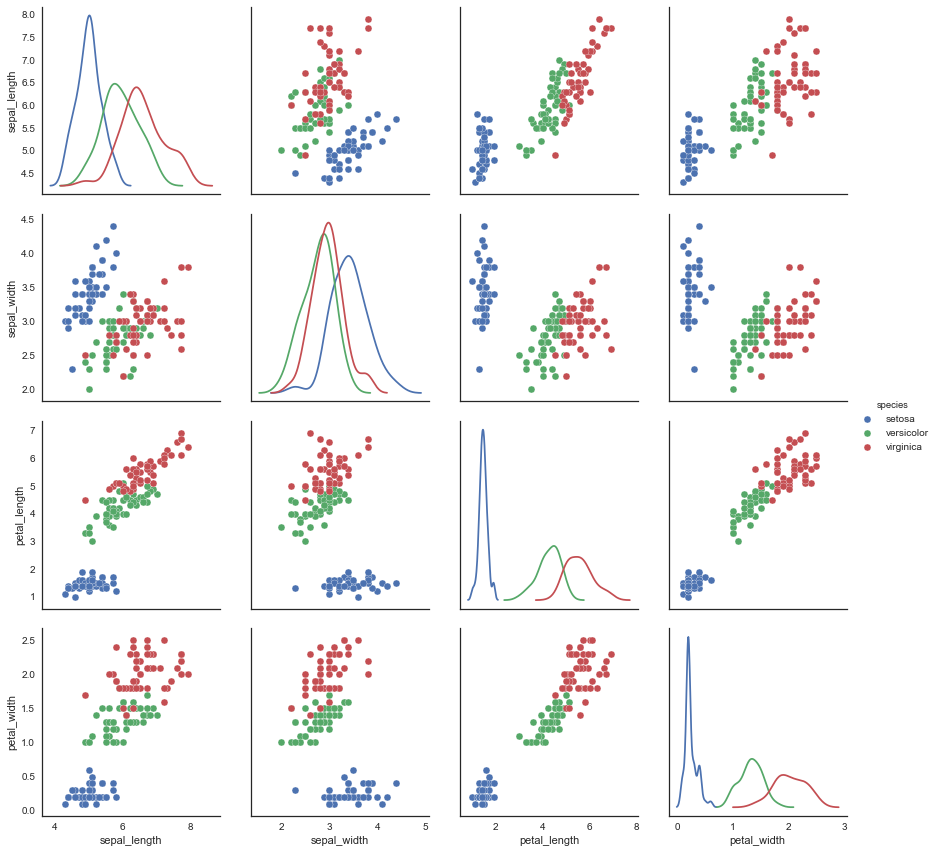

In [7]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=3, diag_kind="kde")

# Loading and preparing the data

In [8]:
iris_dataset = load_iris()

Separate features and labels

In [9]:
X = iris_dataset.data
y = iris_dataset.target

X is a vector of features (_sepal_ and _petal_ _width_ and _length_), y is a vector of labels (_setosa_, _versicolor_, _virginica_)

In [10]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [304]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [303]:
labels = iris_dataset.target_names

Separate the dataset into a training and test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [145]:
X.shape, y.shape

((150, 4), (150,))

In [146]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [147]:
X_test.shape, y_test.shape

((60, 4), (60,))

### Logistic Regression

In [294]:
model = LogisticRegression()

Take only first two dimensions as features (sepal length and width) and separate into training and test datasets with 60/40 split

In [295]:
X_sub = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.4, random_state=42)

Train the model and predict the labels for the test set

In [296]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this model?

In [297]:
model.score(X_test, y_test)

0.71666666666666667

In [222]:
'{0:.2f}'.format(accuracy_score(y_test, y_pred) * 100)

'71.67'

Look up some other accuracy measures and what they mean and calculate them (link to documentation)

In [223]:
^ this

SyntaxError: invalid syntax (<ipython-input-223-40c66aab4c1c>, line 1)

E.g. confusion matrix (add the plotting feature)

In [299]:
confusion_matrix(y_test, y_pred) 

array([[23,  0,  0],
       [ 1,  2, 16],
       [ 0,  0, 18]])

AttributeError: Unknown property legend

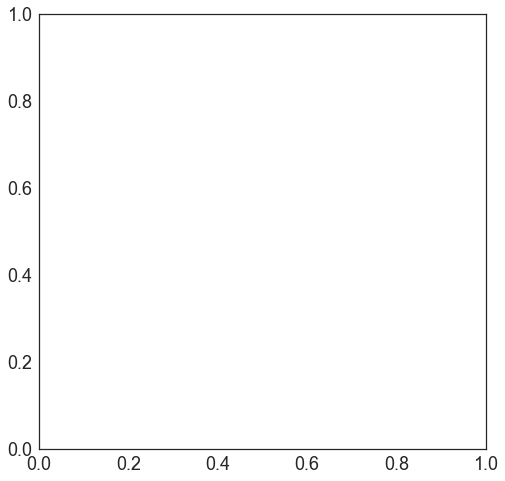

In [324]:
for name, model in models:
    plot_supervised_model('Logistic Regression, 2 features, 40% test set', model, X_test, y_test, y_pred)

Increase the size of the training set to e.g. 80/20 (leave empty for people to do?)

In [226]:
X_sub = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

Train the model and predict the labels for this new model (leave empty for people to do?)

In [227]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this new model?

In [228]:
'{0:.2f}'.format(accuracy_score(y_test, y_pred) * 100)

'83.33'

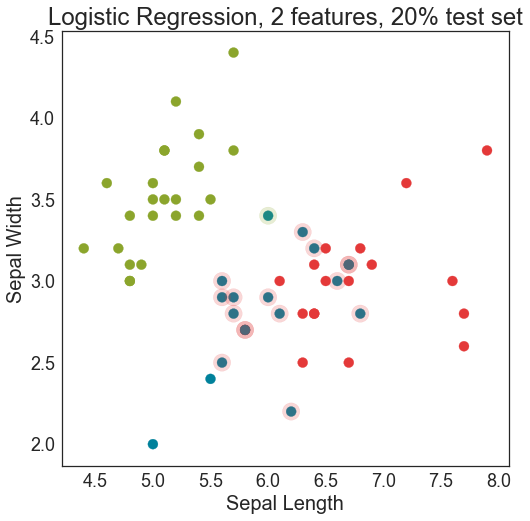

In [326]:
for name, model in models:
    plot_supervised_model('Logistic Regression, 2 features, 20% test set', model, X_test, y_test, y_pred)

Add another feature

In [234]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [235]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [236]:
'{0:.2f}'.format(accuracy_score(y_test, y_pred) * 100)

'90.00'

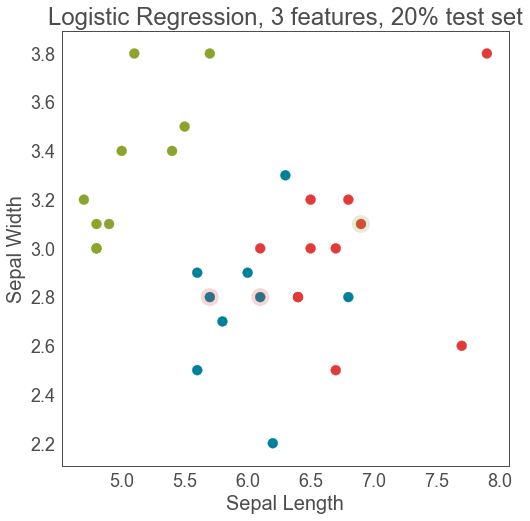

In [237]:
plot_supervised_model('Logistic Regression, 3 features, 20% test set', model, X_test, y_test, y_pred)

As an exercise, now use all 4 features

In [239]:
X_sub = X
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [240]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [241]:
'{0:.2f}'.format(accuracy_score(y_test, y_pred) * 100)

'100.00'

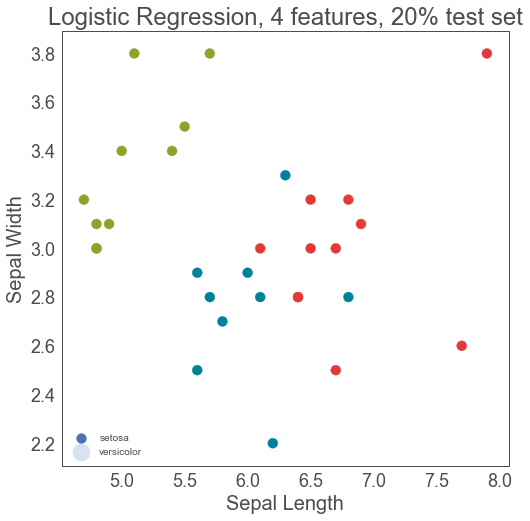

In [245]:
plot_supervised_model('Logistic Regression, 4 features, 20% test set', model, X_test, y_test, y_pred)

### Support Vector Machines

In [284]:
model = SVC()

In [285]:
X_sub = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [286]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [287]:
'{0:.2f}'.format(accuracy_score(y_test, y_pred) * 100)

'90.00'

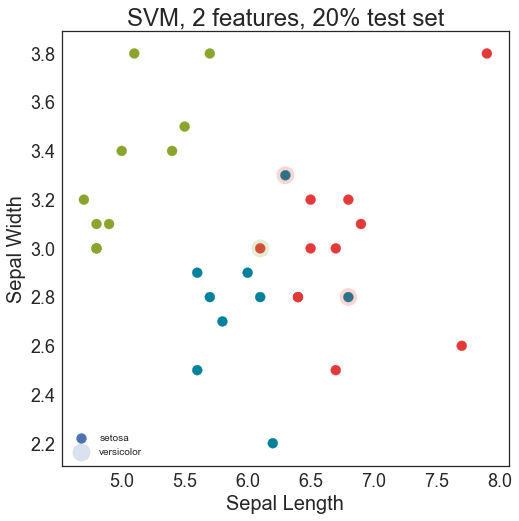

In [288]:
plot_supervised_model('SVM, 2 features, 20% test set', model, X_test, y_test, y_pred)

What is the accuracy of the support vector machine classifier with 3 features?

In [289]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [290]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [293]:
model.score(X_test, y_test)

1.0

In [291]:
'{0:.2f}'.format(accuracy_score(y_test, y_pred) * 100)

'100.00'

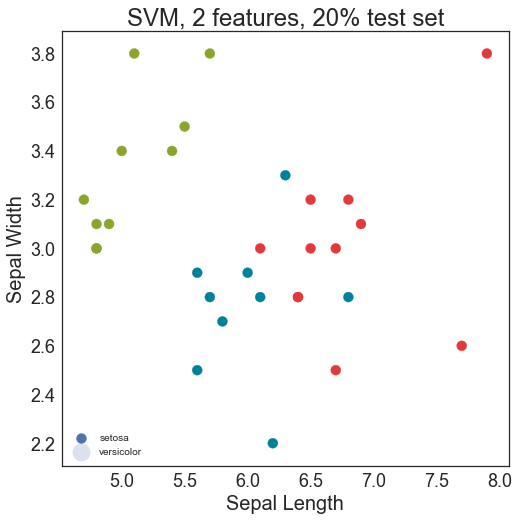

In [292]:
plot_supervised_model('SVM, 2 features, 20% test set', model, X_test, y_test, y_pred)

Cross validation example

### K Means Clustering

In [162]:
models = [('KMeans 8 clusters', KMeans(n_clusters=8)),
          ('KMeans 3 clusters', KMeans(n_clusters=3))]

In [163]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print(confusion_matrix(y_test, model.predict(X_test)))

KMeans 8 clusters
[[ 0 15  0  0  0  0  0  8]
 [ 0  0  0 10  1  0  8  0]
 [ 4  0  5  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
KMeans 3 clusters
[[ 0 23  0]
 [ 2  0 17]
 [16  0  2]]


for name, model in models:
    plot_model(name, model, X)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)